<a href="https://colab.research.google.com/github/Jung0Jin/Python_Machine_Learning/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C5%EC%9E%A5%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장 활용

##5.1 데이터 다운로드

아래 링크를 클릭하면 구글 드라이브에 저장된 데이콘 천체 데이터가 있다. 눌러서 다운로드 받으면 된다.

출처 : https://dacon.io/competitions/official/235573/data/

https://drive.google.com/open?id=1orMiC9Ssy82jQKJUcaF1Nefy3h3ux5vG # train.csv

https://drive.google.com/open?id=1-wdXDwCYvfeA0OUpPQxShvIgk7qGeHyy # test.csv

https://drive.google.com/open?id=1lyTR6IZdnJ-lG3L3iM_S7_BxyQmtBW_U # submission.csv

##5.2 데이터 불러오기

+ 데이터 설명

최근 인류에게 다가온 빅데이터라는 단어는 우주와 천문학에게 낯설지 않습니다. 찰나의 순간에도 우주는 천문학적인 양의 데이터를 생산해왔고, 오래 전부터 천문학자들은 우주를 관측했으며 그 방대함에 비례하는 데이터를 수집 및 분석했기 때문입니다.

슬론 디지털 천체 관측(Sloan Digital Sky Survey: 이하 SDSS)는 세계적 천체 관측 프로젝트로, 우주에 대한 천문학적인 규모의 데이터를 수집하고 있습니다. 이곳에서 수집한 데이터는 약 6,000개 논문에 사용되었고, 25만 회 이상 인용되었을 정도로 천문학에 큰 기여를 했습니다. 점점 거대해지는 규모에 따라 데이터 처리에는 머신러닝과 딥러닝 기법이 활용되기 시작했습니다.

여전히 우주에는 다양한 미지의 이야기가 남아있고, 오늘날 인간은 하늘에서 많은 데이터를 얻어낼 정도로 발전했습니다. 이 데이터를 분석하여 어쩌면 드러나지 않은 규칙이 여러분의 손끝에서 밝혀질 수 있습니다. 새로운 알고리즘을 통해 우주의 비밀을 찾아주세요!



+ 특징 데이터

ID : UniqueID

psfMag : Point spread function magnitudes : 먼 천체를 한 점으로 가정하여 측정한 빛의 밝기입니다. u,g,r,i,z 5개가 있다.

fiberMag : Fiber magnitudes : 3인치 지름의 광섬유를 사용하여 광스펙트럼을 측정합니다. 광섬유를 통과하는 빛의 밝기입니다. u,g,r,i,z 5개가 있다.

petroMag : Petrosian Magnitudes : 은하처럼 뚜렷한 표면이 없는 천체에서는 빛의 밝기를 측정하기 어렵습니다. 천체의 위치와 거리에 상관없이 빛의 밝기를 비교하기 위한 수치입니다. u,g,r,i,z 5개가 있다.

modelMag : Model magnitudes : 천체 중심으로부터 특정 거리의 밝기입니다. u,g,r,i,z 5개가 있다.

fiverID : 관측에 사용된 광섬유의 구분자

+ 타겟 데이터

type : Source type : 천체의 분류

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [0]:
train = pd.read_csv('/content/drive/My Drive/데이터/데이콘 천체 데이터/train.csv', index_col='id')
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [0]:
print(train.shape) # id까지 하면 특성 23개

(199991, 22)


##5.3 베이스 라인 만들기

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   type        199991 non-null  object 
 1   fiberID     199991 non-null  int64  
 2   psfMag_u    199991 non-null  float64
 3   psfMag_g    199991 non-null  float64
 4   psfMag_r    199991 non-null  float64
 5   psfMag_i    199991 non-null  float64
 6   psfMag_z    199991 non-null  float64
 7   fiberMag_u  199991 non-null  float64
 8   fiberMag_g  199991 non-null  float64
 9   fiberMag_r  199991 non-null  float64
 10  fiberMag_i  199991 non-null  float64
 11  fiberMag_z  199991 non-null  float64
 12  petroMag_u  199991 non-null  float64
 13  petroMag_g  199991 non-null  float64
 14  petroMag_r  199991 non-null  float64
 15  petroMag_i  199991 non-null  float64
 16  petroMag_z  199991 non-null  float64
 17  modelMag_u  199991 non-null  float64
 18  modelMag_g  199991 non-null  float64
 19  mo

In [0]:
train.isnull().sum()

type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

결측치가 하나도 없다.

In [0]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


label 값이 범주형 데이터니까 정수로 인코딩 시켜주자.

In [0]:
unique_labels = np.unique(train['type'])
unique_labels

array(['GALAXY', 'QSO', 'REDDEN_STD', 'ROSAT_D', 'SERENDIPITY_BLUE',
       'SERENDIPITY_DISTANT', 'SERENDIPITY_FIRST', 'SERENDIPITY_MANUAL',
       'SERENDIPITY_RED', 'SKY', 'SPECTROPHOTO_STD', 'STAR_BHB',
       'STAR_BROWN_DWARF', 'STAR_CARBON', 'STAR_CATY_VAR', 'STAR_PN',
       'STAR_RED_DWARF', 'STAR_SUB_DWARF', 'STAR_WHITE_DWARF'],
      dtype=object)

In [0]:
class_mapping = {label : idx for idx, label in enumerate(np.unique(train['type']))}
class_mapping

{'GALAXY': 0,
 'QSO': 1,
 'REDDEN_STD': 2,
 'ROSAT_D': 3,
 'SERENDIPITY_BLUE': 4,
 'SERENDIPITY_DISTANT': 5,
 'SERENDIPITY_FIRST': 6,
 'SERENDIPITY_MANUAL': 7,
 'SERENDIPITY_RED': 8,
 'SKY': 9,
 'SPECTROPHOTO_STD': 10,
 'STAR_BHB': 11,
 'STAR_BROWN_DWARF': 12,
 'STAR_CARBON': 13,
 'STAR_CATY_VAR': 14,
 'STAR_PN': 15,
 'STAR_RED_DWARF': 16,
 'STAR_SUB_DWARF': 17,
 'STAR_WHITE_DWARF': 18}

In [0]:
train['type'] = train['type'].map(class_mapping)

In [0]:
np.unique(train['type'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [0]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,1,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,1,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,1,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,16,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


fiberID가 순서가 있는 범주형 특성인 것 같으니 버리자

In [0]:
y = train[['type']]
X = train.drop(columns=['fiberID', 'type'])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns, index=train.index)

In [0]:
print(X_std.shape, y.shape)

(199991, 20) (199991, 1)


###5.3.1 데이터 세트 만들기

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0, stratify=y)

###5.3.2 로지스틱 회귀

5분 걸리고 정확도는 훈련, 검증 둘 다 0.46 다.

In [0]:
# from sklearn.linear_model import LogisticRegression

In [0]:
# lr = LogisticRegression(solver='liblinear', multi_class='auto', n_jobs=-1, random_state=1)

In [0]:
# %%time
# lr.fit(X_train, y_train)

In [0]:
# print(f'훈련 세트 정확도 : {lr.score(X_train, y_train)}')

In [0]:
# print(f'검증 세트 정확도 : {lr.score(X_test, y_test)}')

##5.3.3 랜덤 포레스트 분류기

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# max_depth = 10 까지는 오버피팅 안난다.
forest = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=1)

In [0]:
%%time
forest.fit(X_train, y_train)

CPU times: user 1min 43s, sys: 114 ms, total: 1min 43s
Wall time: 52.7 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
print(f'훈련 세트 정확도 : {forest.score(X_train, y_train)}')

훈련 세트 정확도 : 0.8589804490224511


In [0]:
print(f'검증 세트 정확도 : {forest.score(X_test, y_test)}')

검증 세트 정확도 : 0.8458711467786695


##5.3.4 커널 SVM 분류기

43분 걸리고 정확도는 훈련, 검증 둘다 0.53 다.

In [0]:
# from sklearn.svm import SVC

In [0]:
# svm = SVC(kernel='rbf', random_state=1)

In [0]:
# %%time
# svm.fit(X_train, y_train)

In [0]:
# print(f'훈련 세트 정확도 : {svm.score(X_train, y_train)}')

In [0]:
# print(f'검증 세트 정확도 : {svm.score(X_test, y_test)}')

##5.4 데이터 전처리

In [0]:
train = pd.read_csv('/content/drive/My Drive/데이터/데이콘 천체 데이터/train.csv', index_col='id')
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


클래스 별 개수 확인

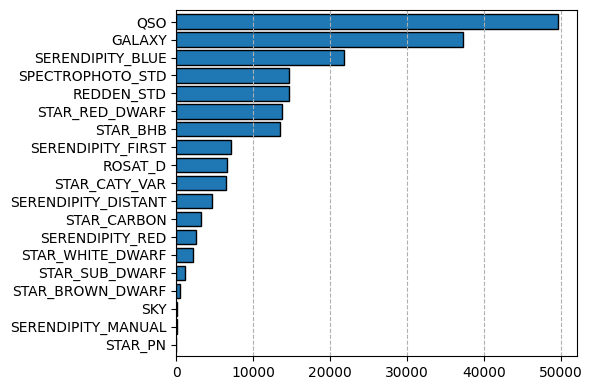

In [0]:
fig, ax = plt.subplots(dpi=100)
train['type'].value_counts(ascending=True).plot(kind='barh', width=0.8, edgecolor='black', ax=ax)
ax.grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

각 특성 이상치 확인

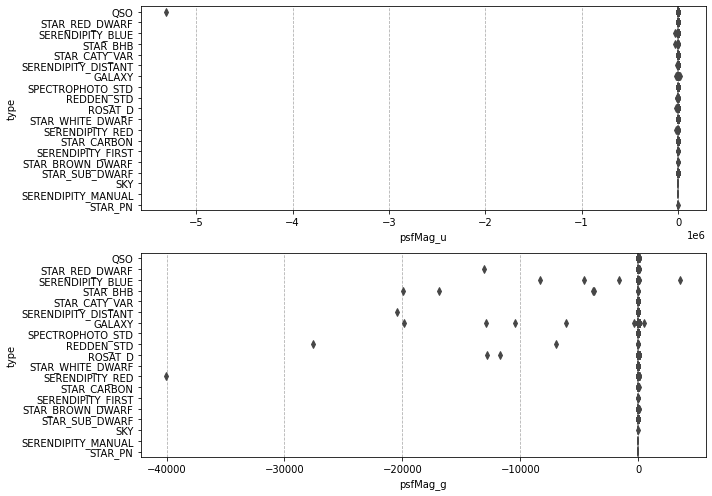

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='psf').columns.tolist()[:2]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

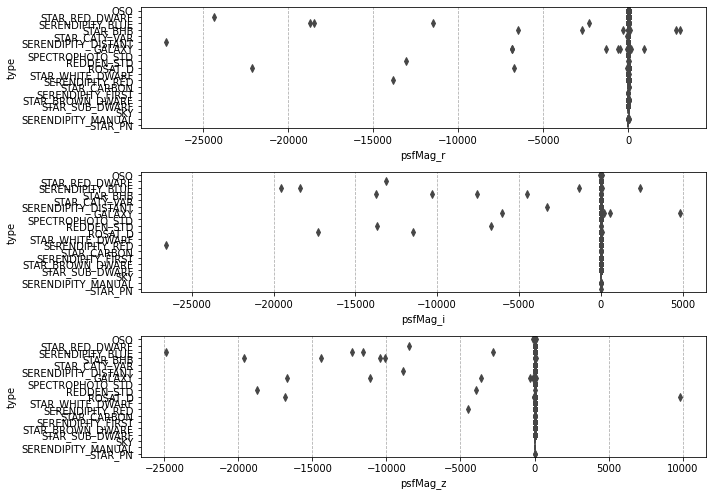

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='psf').columns.tolist()[2:5]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

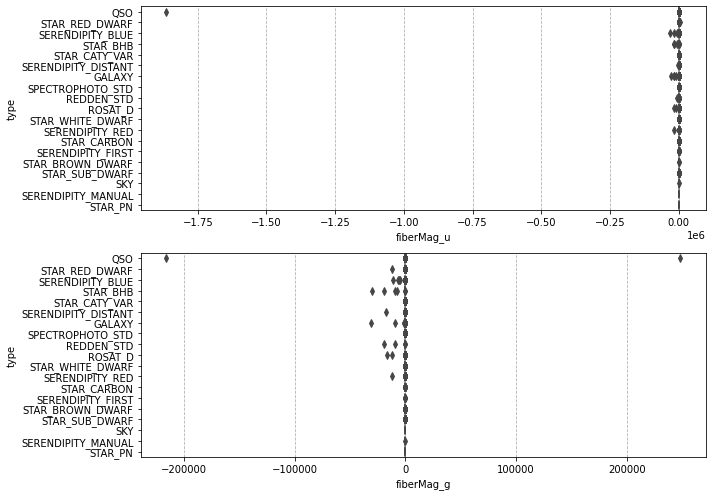

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='fiber').columns.tolist()[1:3]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

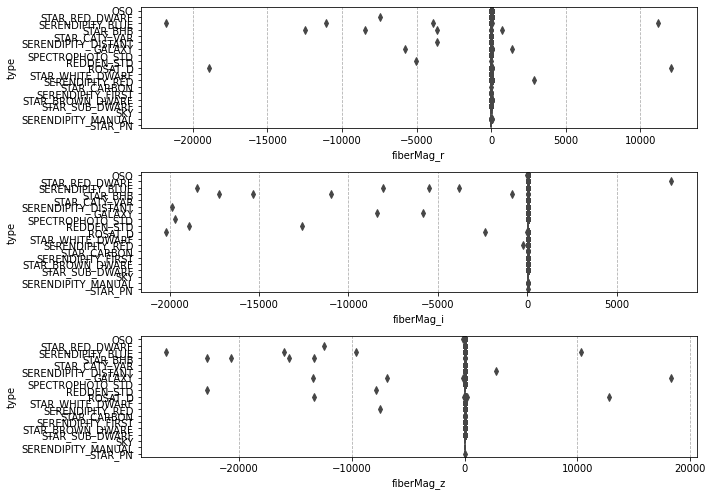

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='fiber').columns.tolist()[3:6]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

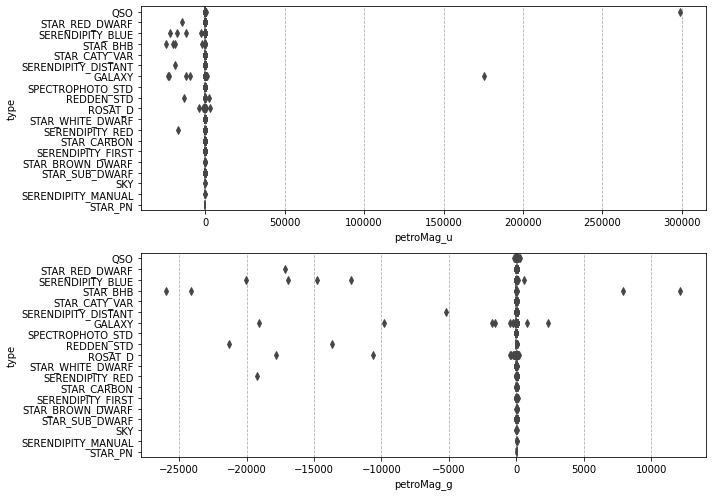

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='petro').columns.tolist()[:2]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

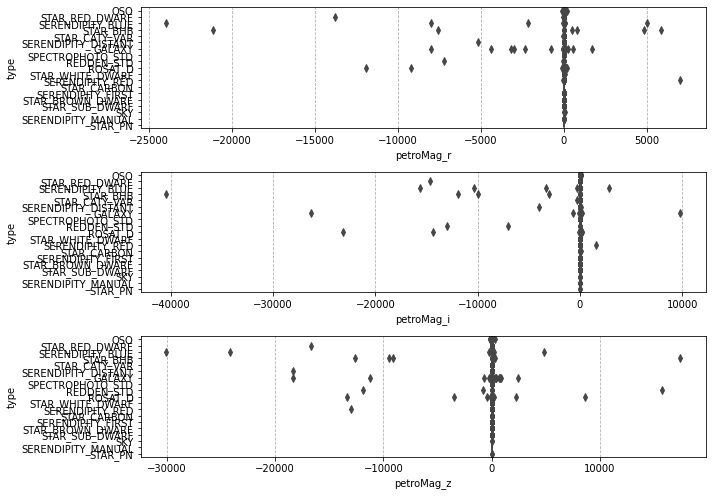

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='petro').columns.tolist()[2:5]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

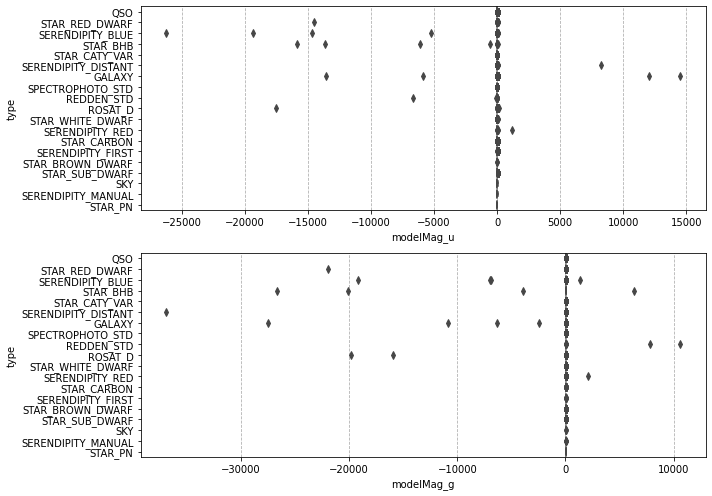

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='model').columns.tolist()[:2]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

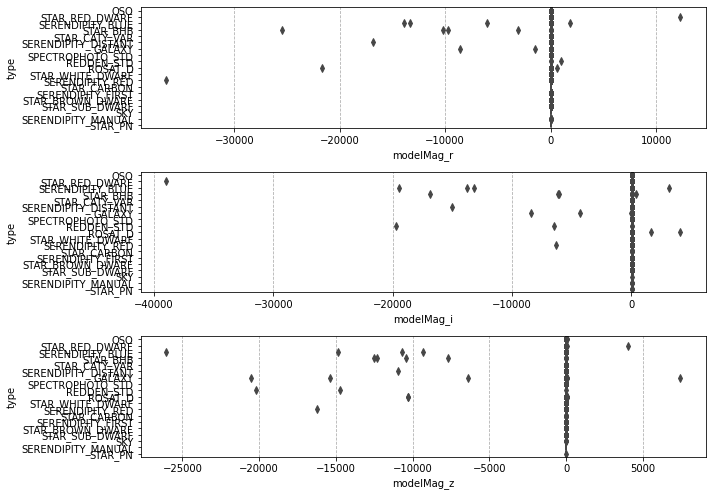

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='model').columns.tolist()[2:5]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

In [0]:
# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['psfMag_u'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

15.890827009484177
25.922194569116776


In [0]:
train = train[q1-iqr*1.5<train['psfMag_u']]
train = train[train['psfMag_u']<q3+iqr*1.5]

In [0]:
# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['psfMag_g'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

15.058392384854072
24.705532276186077


In [0]:
train = train[q1-iqr*1.5<train['psfMag_g']]
train = train[train['psfMag_g']<q3+iqr*1.5]

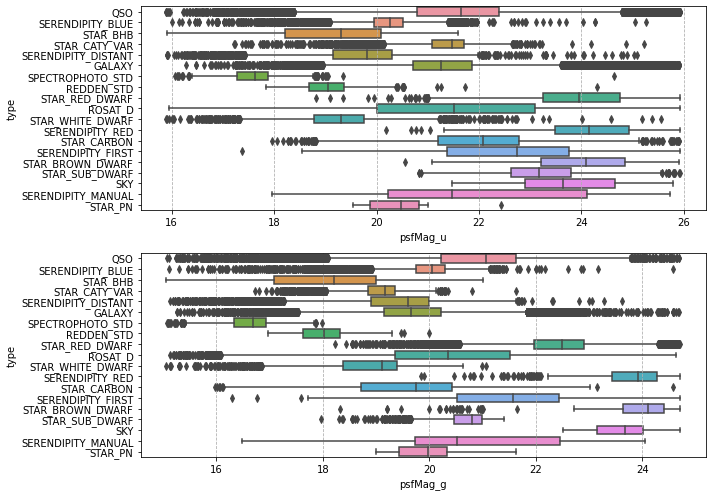

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='psf').columns.tolist()[:2]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

In [0]:
# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['psfMag_r'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['psfMag_r']]
train = train[train['psfMag_r']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['psfMag_i'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['psfMag_i']]
train = train[train['psfMag_i']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['psfMag_z'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['psfMag_z']]
train = train[train['psfMag_z']<q3+iqr*1.5]

14.381188414796382
24.111975813372894
14.230211107998036
23.54954254051406
13.696551978485509
23.60192554312389


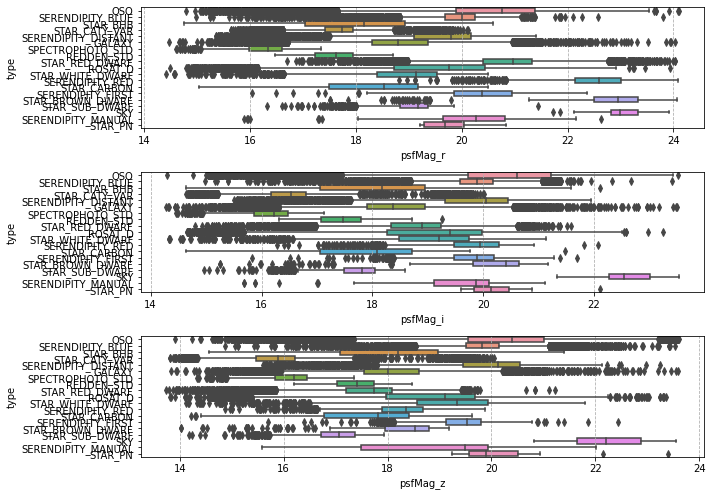

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='psf').columns.tolist()[2:5]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

In [0]:
# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['fiberMag_u'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['fiberMag_u']]
train = train[train['fiberMag_u']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['fiberMag_g'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['fiberMag_g']]
train = train[train['fiberMag_g']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['fiberMag_r'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['fiberMag_r']]
train = train[train['fiberMag_r']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['fiberMag_i'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['fiberMag_i']]
train = train[train['fiberMag_i']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['fiberMag_z'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['fiberMag_z']]
train = train[train['fiberMag_z']<q3+iqr*1.5]

16.42303187268091
25.739761686531295
15.30472080474904
24.795485951127063
14.525322912319663
24.394260199445565
14.198172520386539
23.97465635506423
13.724480532829178
24.002238315158294


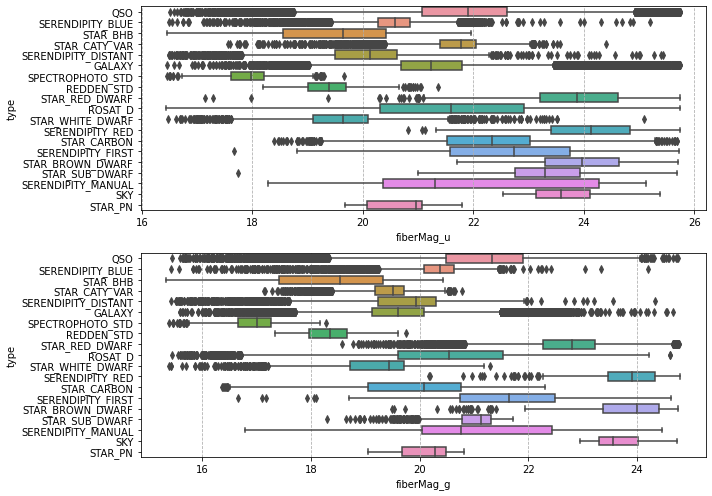

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='fiber').columns.tolist()[1:3]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

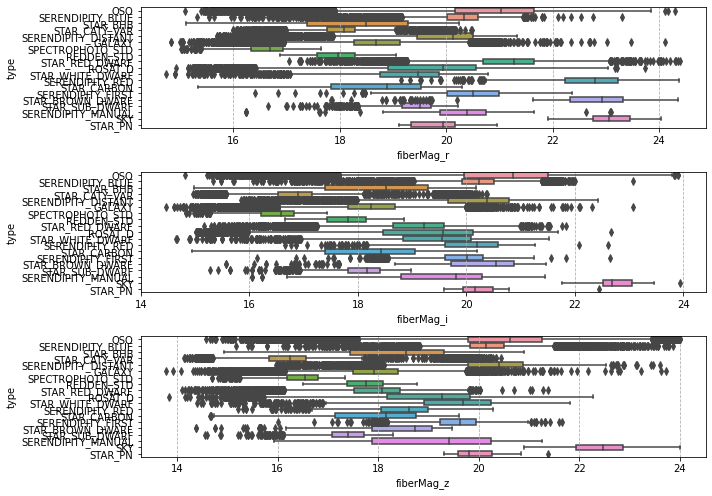

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='fiber').columns.tolist()[3:6]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

In [0]:
# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['petroMag_u'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['petroMag_u']]
train = train[train['petroMag_u']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['petroMag_g'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['petroMag_g']]
train = train[train['petroMag_g']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['petroMag_r'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['petroMag_r']]
train = train[train['petroMag_r']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['petroMag_i'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['petroMag_i']]
train = train[train['petroMag_i']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['petroMag_z'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['petroMag_z']]
train = train[train['petroMag_z']<q3+iqr*1.5]

15.557405400618583
25.2992606859495
14.06530680092345
24.62407027437105
13.055003955703777
24.63856909603117
12.459624322768581
24.496339144526495
12.102167151129068
24.448165933322556


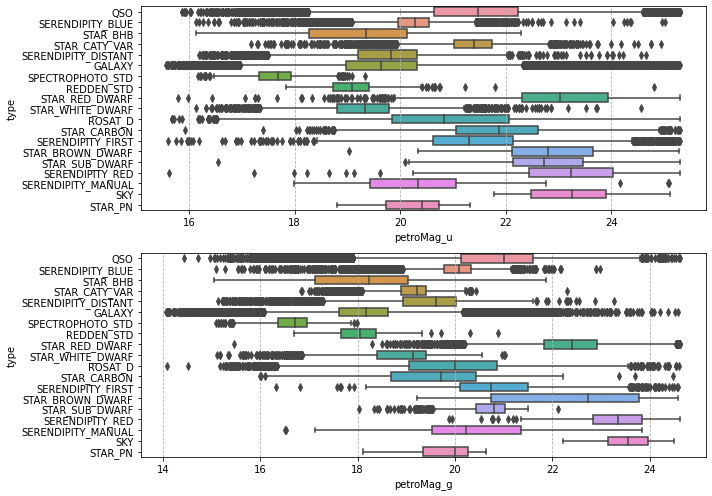

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='petro').columns.tolist()[:2]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

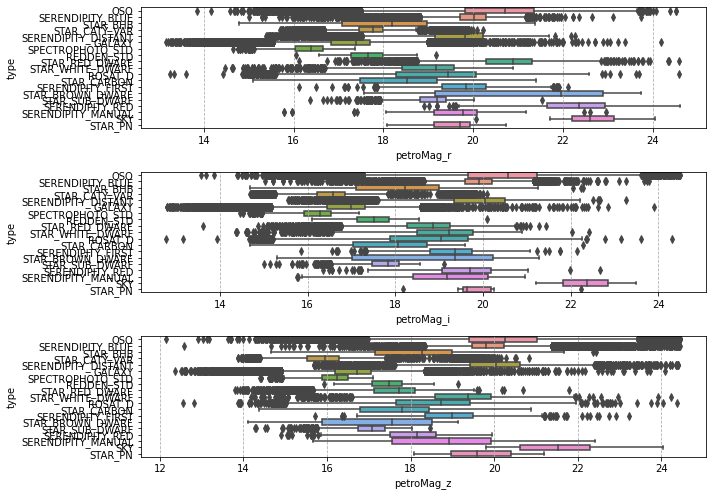

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='petro').columns.tolist()[2:5]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

In [0]:
# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['modelMag_u'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['modelMag_u']]
train = train[train['modelMag_u']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['modelMag_g'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['modelMag_g']]
train = train[train['modelMag_g']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['modelMag_r'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['modelMag_r']]
train = train[train['modelMag_r']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['modelMag_i'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['modelMag_i']]
train = train[train['modelMag_i']<q3+iqr*1.5]

# 이상치 제거
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQP보다 크면 이상치
x = train['modelMag_z'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

train = train[q1-iqr*1.5<train['modelMag_z']]
train = train[train['modelMag_z']<q3+iqr*1.5]

15.51652229604437
25.23251016387438
14.128463040140023
24.318302198255825
12.997268775811495
24.510523939617105
12.314239237004736
24.47508468607844
11.816380713481589
24.619102845140485


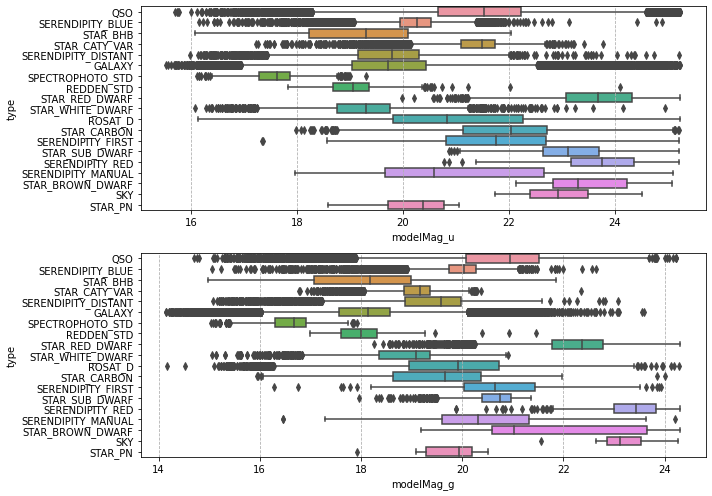

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
columns = train.filter(regex='model').columns.tolist()[:2]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

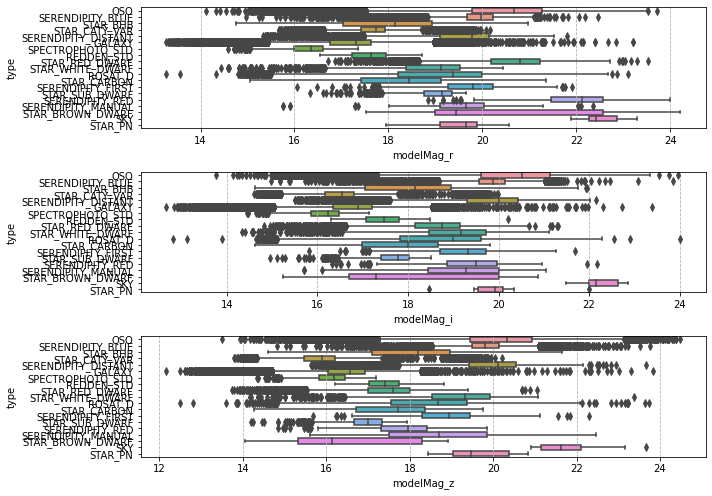

In [0]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))
columns = train.filter(regex='model').columns.tolist()[2:5]
for i, column in enumerate(columns):
  sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
  axes.flat[i].grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

이상치를 제거한 상태로 랜덤 포레스트에 넣어보자.

In [0]:
# 클래스 정수 인코딩 해주기
unique_labels = np.unique(train['type'])
class_mapping = {label : idx for idx, label in enumerate(np.unique(train['type']))}
train['type'] = train['type'].map(class_mapping)

In [0]:
# 데이터 셋으로 만들기
y = train[['type']]
X = train.drop(columns=['fiberID', 'type']) # fiberID는 순서가 있는 범주형 데이터다 버린다.

In [0]:
# 표준화 해준다.
X_std = scaler.fit_transform(X)
X_std

array([[ 1.44809276e+00,  1.10885563e+00,  1.38935399e+00, ...,
         1.49830800e+00,  1.45761918e+00,  1.57395145e+00],
       [ 4.52714990e-01,  6.74454523e-01,  9.93625082e-01, ...,
         1.15147310e+00,  1.27507315e+00,  1.23329460e+00],
       [-1.56404790e+00, -1.71417201e+00, -1.49747200e+00, ...,
        -1.18591713e+00, -9.74957909e-01, -8.17743946e-01],
       ...,
       [ 1.70598391e-03,  5.12309933e-01,  6.02383586e-01, ...,
         7.30971579e-01,  9.22803468e-01,  8.84711354e-01],
       [ 3.06607626e-01,  5.86298634e-01,  5.90546976e-01, ...,
        -7.31768465e-01, -6.77294555e-01, -6.67042913e-01],
       [-1.83338544e-03,  3.22883639e-01,  7.77721129e-01, ...,
         9.09060325e-01,  1.00941807e+00,  9.55796220e-01]])

In [0]:
X_std = pd.DataFrame(X_std, columns=X.columns, index=train.index)
print(X_std.shape, y.shape)

(179595, 20) (179595, 1)


기존보다 데이터 샘플 수가 2만 개 정도는 날라간 것 같다.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0, stratify=y)

In [0]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=1)

In [0]:
%%time
forest.fit(X_train, y_train)
print(f'훈련 세트 정확도 : {forest.score(X_train, y_train)}')
print(f'검증 세트 정확도 : {forest.score(X_test, y_test)}')

훈련 세트 정확도 : 0.8591970823241182
검증 세트 정확도 : 0.8442606976808931
CPU times: user 1min 42s, sys: 173 ms, total: 1min 42s
Wall time: 52.4 s


상관도를 분석해보자.

In [0]:
train.corr()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
type,1.000000,-0.113462,-0.129137,-0.212871,-0.287795,-0.407917,-0.434916,-0.111092,-0.167936,-0.229491,-0.342475,-0.372907,0.000376,-0.043605,-0.101883,-0.209192,-0.243206,0.019873,-0.043954,-0.099294,-0.204970,-0.238683
fiberID,-0.113462,1.000000,0.098373,0.141321,0.174137,0.189856,0.188193,0.107354,0.149175,0.181536,0.197260,0.191915,0.137434,0.165436,0.190891,0.204027,0.195449,0.128483,0.165695,0.190905,0.203731,0.199248
psfMag_u,-0.129137,0.098373,1.000000,0.896221,0.749685,0.581419,0.453749,0.968225,0.876757,0.713728,0.540776,0.414082,0.855337,0.773748,0.603304,0.446553,0.333809,0.912056,0.776074,0.601528,0.442450,0.331899
psfMag_g,-0.212871,0.141321,0.896221,1.000000,0.945316,0.822856,0.715749,0.901990,0.990371,0.922917,0.795821,0.686363,0.838541,0.916964,0.829164,0.710766,0.607325,0.873791,0.921194,0.828992,0.709285,0.612996
psfMag_r,-0.287795,0.174137,0.749685,0.945316,1.000000,0.950397,0.881752,0.765059,0.946946,0.987275,0.934659,0.861656,0.751366,0.905048,0.916962,0.864119,0.789375,0.763143,0.909328,0.917587,0.864117,0.799810
psfMag_i,-0.407917,0.189856,0.581419,0.822856,0.950397,1.000000,0.976192,0.601540,0.825573,0.942107,0.984577,0.957155,0.612421,0.798469,0.882888,0.916989,0.881374,0.604286,0.802403,0.883922,0.917974,0.894300
psfMag_z,-0.434916,0.188193,0.453749,0.715749,0.881752,0.976192,1.000000,0.476333,0.721107,0.878939,0.968371,0.977224,0.508988,0.711715,0.835870,0.911892,0.909756,0.490704,0.715376,0.837451,0.913511,0.924865
fiberMag_u,-0.111092,0.107354,0.968225,0.901990,0.765059,0.601540,0.476333,1.000000,0.894276,0.742413,0.575232,0.449950,0.879584,0.805392,0.643900,0.491241,0.377074,0.925694,0.807959,0.642533,0.487643,0.376960
fiberMag_g,-0.167936,0.149175,0.876757,0.990371,0.946946,0.825573,0.721107,0.894276,1.000000,0.942338,0.817558,0.709421,0.857173,0.947052,0.868323,0.750557,0.645328,0.889780,0.950722,0.868531,0.749824,0.653050
fiberMag_r,-0.229491,0.181536,0.713728,0.922917,0.987275,0.942107,0.878939,0.742413,0.942338,1.000000,0.950592,0.880555,0.762520,0.929558,0.953635,0.903136,0.828007,0.770985,0.934062,0.954770,0.904303,0.841127


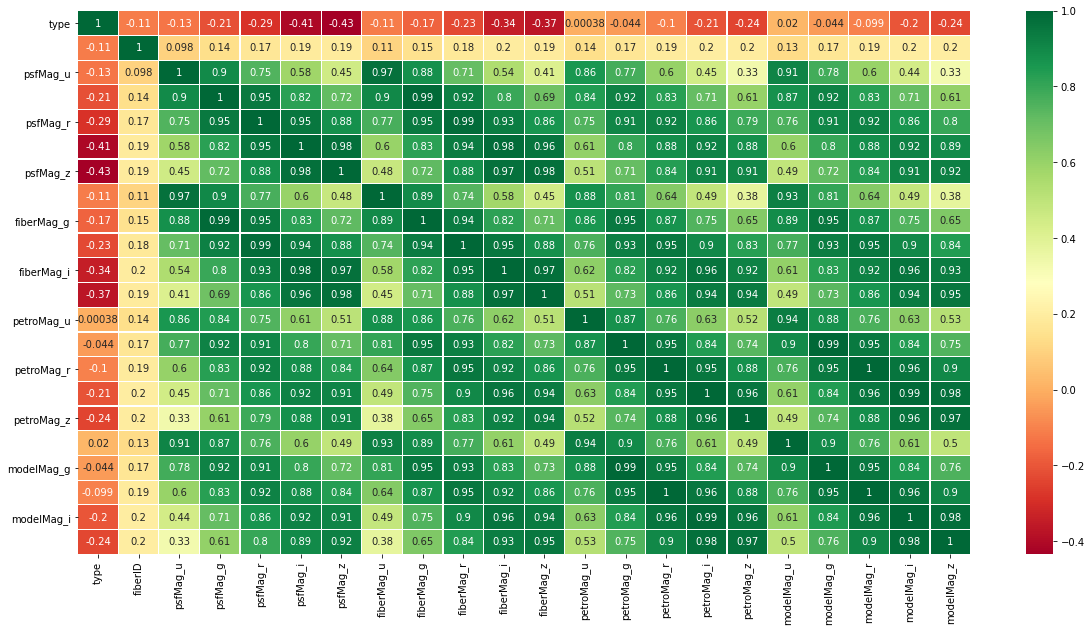

In [0]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()


r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [0]:
# 상관계수의 절댓값이 0.1 보다 낮은 특성을 찾자.
temp = []
for i, v in enumerate(train.corr()['type']):
  if abs(v) < 0.1:
    temp.append(train.corr()['type'].index[i])
temp


['petroMag_u', 'petroMag_g', 'modelMag_u', 'modelMag_g', 'modelMag_r']

In [0]:
# 상관계수의 절대값이 0.1 보다 낮은 특성은 버리자.
train = train.drop(temp, axis=1)
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_r,petroMag_i,petroMag_z,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,
0,1,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,21.478312,21.145409,20.422446,21.020605,21.147340
1,1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,20.889705,20.639812,20.646660,20.693389,20.512314
2,1,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,16.688874,16.744210,16.808006,16.660177,16.688928
3,1,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,19.985531,19.750917,19.455117,19.758113,19.552855
5,4,76,19.781358,19.315942,19.431752,19.600843,19.674611,20.167919,19.661686,19.785276,19.928729,19.877216,19.552879,19.688197,19.799425,19.598653,19.677858


In [0]:
# 데이터 셋으로 만들기
y = train[['type']]
X = train.drop(columns=['fiberID', 'type']) # fiberID는 순서가 있는 범주형 데이터다 버린다.

# 표준화 해준다.
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns, index=train.index)
print(X_std.shape, y.shape)

(179595, 15) (179595, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0, stratify=y)
forest = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=1)

In [0]:
%%time
forest.fit(X_train, y_train)
print(f'훈련 세트 정확도 : {forest.score(X_train, y_train)}')
print(f'검증 세트 정확도 : {forest.score(X_test, y_test)}')

훈련 세트 정확도 : 0.8568584871516468
검증 세트 정확도 : 0.8423953896266599
CPU times: user 1min 22s, sys: 129 ms, total: 1min 22s
Wall time: 42.3 s


검증 정확도가 0.002정도 떨어졌다. 속도는 20초 빨라졌다.